# Data Mining

## Tugas 2: Analisis Data dan Visualisasi

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas2_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi *dilarang keras* menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Terdapat enam *packages* yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- pandas
- scipy
- seaborn
- scikit-learn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini, kecuali dijelaskan sebaliknya. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda.

Pastikan jawaban Anda singkat, padat, dan jelas. Mayoritas pertanyaan yang diberikan dapat dijawab dalam 3-4 kalimat saja.

### Import

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Modul tambahan untuk membuat Bag-of-Words dan cosine similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# Membaca file
df = pd.read_pickle('../Data Mining/dataset/spam.p')

In [4]:
pd.set_option('display.max_columns', None)

### Deskripsi Dataset

Tugas ini didasarkan pada tugas klasifikasi spam yang dilakukan dalam makalah oleh [Septiandri dan Wibisono (2016)](https://iopscience.iop.org/article/10.1088/1742-6596/801/1/012069/pdf). Spam dalam komentar Instagram didefinisikan sebagai komentar yang memiliki tujuan untuk mempromosikan sesuatu, baik itu produk maupun jasa, yang tidak berhubungan dengan pos aslinya; sedangkan ham adalah komentar yang bukan spam. Tugas kali ini lebih difokuskan pada eksplorasi data tersebut, bukan pada proses klasifikasinya.

Ada dua kelompok fitur utama dalam dataset yang diberikan: fitur dasar dan pola kata kunci yang dikumpulkan sendiri. Beberapa contoh fitur dasarnya antara lain: jumlah token, jumlah emoji, dan jumlah huruf kapital. Sementara pola kata kunci yang didapat (menggunakan regex) antara lain:

- `s(o|u|ou)venir`
- `yu+k`
- `free (delivery|ongkos|ongkir|pengiriman)|gratis|murah|promo|terjangkau`.

Dataset ini juga menyimpan id dari pos yang diberikan komentar (`id_post`) dan user yang menghasilkan pos tersebut (`username_post`). Teks asli dari komentar tersebut juga terkandung dalam dataset ini agar dapat Anda eksplorasi dan coba beberapa jenis representasi yang diperlukan. Harapannya, eksplorasi Anda dapat menghasilkan hal baru yang belum tercakup dalam makalah tersebut.

## 1. Eksplorasi Awal Dataset (25 poin)

Tugas Anda adalah melaporkan beberapa *summary statistics* yang diperlukan untuk memahami dataset yang digunakan.

### Soal 1.1 (3 poin)
Laporkan deskripsi data tanpa memunculkan ID dari komentar tersebut.

In [5]:
# Kode Anda
df.iloc[:,1:]

,text,time,username,label,post_id,comments,id_post,likes,media,text_post,time_post,type,username_post,tokens,emojis,n_char,n_token,n_capital,n_number,n_emoji,n_unique_emoji,n_mention,%_capital,%_number,%_emoji,%_unique_emoji,log_char,has_phone_number,has_bbm_pin,has_pattern_(ch?ec?k|intip|liat|kepoin)( out)?( (our|my))? (ig|insta|koleksi|profil),has_pattern_bbm|pin bb|line|whatsapp,has_pattern_cekidot,has_pattern_dada|herba|langsing|payudara|pemutih|penggemuk|peninggi|tahan lama|tinggi badan,has_pattern_efek samping,has_pattern_follow,has_pattern_free (delivery|ongkos|ongkir|pengiriman)|gratis|murah|promo|terjangkau,has_pattern_garansi|kualitas,has_pattern_impor,has_pattern_invit,has_pattern_jerawat,has_pattern_jual|sell,has_pattern_langganan,has_pattern_luar biasa,has_pattern_mampir,has_pattern_nyaranin,has_pattern_order,has_pattern_password,has_pattern_penghasilan,has_pattern_produk,has_pattern_s(o|u|ou)venir,has_pattern_stock|stok,has_pattern_yu+k
0,ðApa apaan ni orang ngehujat:v,1456626742,dhip.hop,0,quDw53pwyi,5381,quDw53pwyi,7727,https://scontent-sit4-1.cdninstagram.com/t51.2...,"LAUNCHED on Youtube. The Unspoken Episode #2 ""...",1405959812,image,marshanda99,"['ðApa', 'apaan', 'ni', 'orang', 'ngehujat'...",['ð'],30,6,1,0,1,1,0,0.033333,0.000000,0.033333,0.033333,3.401197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Makasih makasih makasih@dr.asharisukma.herbal ...,1472167732,ismanurhidayah,1,BIjrV1CBETa,2593,BIjrV1CBETa,48251,https://scontent-sit4-1.cdninstagram.com/t51.2...,Happy Monday ð wearing @lunahabit #ootd #lu...,1470035972,image,lunamaya,"['Makasih', 'makasih', 'makasih', 'dr', 'ashar...","['ð', 'ð', 'ð', 'ð']",195,31,1,0,4,3,2,0.005128,0.000000,0.020513,0.015385,5.273000,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,TEMUKAN RAHASIA TUBUH IDEAL & KULIT MULUS PARA...,1469059826,natureherbal01,1,BHmAoO5DZXo,1576,BHmAoO5DZXo,8710,https://scontent-sit4-1.cdninstagram.com/t51.2...,CIMB NIAGA,1467966758,image,ollaramlanaufar,"['TEMUKAN', 'RAHASIA', 'TUBUH', 'IDEAL', 'KULI...",[],173,23,122,17,0,0,1,0.705202,0.098266,0.000000,0.000000,5.153292,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,ANJIRRR UDAH S2 -___- baru ngeh,1454001326,fcxman,0,4-Dgl_QjlG,2341,4-Dgl_QjlG,44427,https://scontent-sit4-1.cdninstagram.com/t51.2...,Semua ini dimulai dari mimpi sewaktu saya kela...,1436561320,image,vidialdiano,"['ANJIRRR', 'UDAH', 'S2', 'baru', 'ngeh']",[],31,5,12,1,0,0,0,0.387097,0.032258,0.000000,0.000000,3.433987,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Hai cantik.. Mampir yuuk ð ga digembok loh ...,1474523642,perlengkapan_rumah_tangga,1,BJxbhNojtlj,2119,BJxbhNojtlj,87901,https://scontent-sit4-1.cdninstagram.com/t51.2...,A human body is an instrument for the producti...,1472644923,image,arieltatum,"['Hai', 'cantik', 'Mampir', 'yuuk', 'ð', 'g...","['ð', 'ð', 'ð', 'ð', 'ð', 'ð']",70,12,21,0,6,3,0,0.300000,0.000000,0.085714,0.042857,4.248495,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
5,ð HOT PROMO hub 7d48707e,1411523677,peninggi_termurah_se_asia,1,sX6h_wl2o_,3679,sX6h_wl2o_,49269,https://scontent-sit4-1.cdninstagram.com/t51.2...,Thank you semuanya. I love you all ð»,1409511741,image,alghazali7,"['ð', 'HOT', 'PROMO', 'hub', '7d48707e']",['ð'],24,5,8,6,1,1,0,0.333333,0.250000,0.041667,0.041667,3.178054,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,@dia

### Soal 1.2 (2 poin)

Berapa dimensi dari data yang Anda gunakan?

In [6]:
# Kode Anda
df.shape

(14761, 53)

### Soal 1.3 (4 poin)

Berapa jumlah label spam dan ham?

*Petunjuk: Periksa kolom `label`! (1 = spam, 0 = ham)*

In [7]:
# Kode Anda
print('Ham = ', df[df['label']==0]['label'].count())
print('Spam = ', df[df['label']==1]['label'].count())

Ham =  13658
Spam =  1103


### Soal 1.4 (12 poin)

Laporkan median, rata-rata, dan simpangan baku untuk:
- `comments` per `username_post`
- `likes` per `username_post`

*Catatan*: Pastikan bahwa `id_post` untuk setiap `username_post` unik!

In [8]:
df.groupby(['username_post'])['comments'].agg(['median','mean','std']).reset_index()

,username_post,median,mean,std
0,_irishbella_,884.0,965.759494,281.362686
1,addiems999,159.0,190.153846,59.578424
2,adiadrian_ds,146.0,157.901408,48.321223
3,afgansyah.reza,4488.0,4550.654676,782.906103
4,agnezmo,24030.0,31650.820690,16514.823389
5,ahmaddhaniprast,1341.0,1677.637584,735.293021
6,aku_naura,5382.0,5290.804054,1512.205533
7,alghazali7,4680.0,4745.181250,1047.568204
8,aliandooo,13476.0,33718.829114,41719.642325
9,ananghijau,292.0,303.664557,71.679187


In [9]:
df.groupby(['username_post'])['likes'].agg(['median','mean','std']).reset_index()

,username_post,median,mean,std
0,_irishbella_,22954.0,20351.917722,6370.207665
1,addiems999,3619.0,5380.307692,4442.509694
2,adiadrian_ds,3519.0,4813.683099,3234.696674
3,afgansyah.reza,49363.0,53655.381295,14557.555641
4,agnezmo,101971.0,109867.441379,17895.437298
5,ahmaddhaniprast,3843.0,5350.778523,4651.918562
6,aku_naura,16498.0,15503.445946,4851.380069
7,alghazali7,63841.0,79619.043750,30577.110277
8,aliandooo,164783.0,140089.481013,47366.346492
9,ananghijau,5906.0,6733.113924,3544.443862


### Soal 1.5 (4 poin)

Kapan kita lebih mementingkan nilai median dibandingkan rata-rata?

*Ketika data tidak terdistribusi normal atau data memiliki outlayer (pencilan)*

## 2. Visualisasi Data dan Jarak Antarobjek (75 poin)

Pada bagian ini, Anda diminta untuk memberikan grafik dari beberapa komponen yang ada dalam dataset. Jangan lupa untuk memberikan label pada setiap sumbu dari grafik yang Anda hasilkan! Selain itu, Anda juga diminta untuk memberikan beberapa perhitungan jarak antarobjek dan membuat sebuah metode klasifikasi sederhana.

### Soal 2.1.a (5 poin)

Gambarkan scatter plot untuk atribut `n_char` vs `n_emoji`

Text(0, 0.5, 'n_emoji')

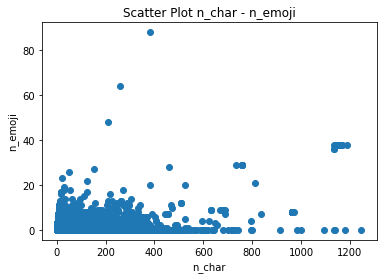

In [10]:
# Kode Anda
plt.scatter(df['n_char'],df['n_emoji'])
plt.title('Scatter Plot n_char - n_emoji')
plt.xlabel('n_char')
plt.ylabel('n_emoji')

### Soal 2.1.b (5 poin)

Berapa nilai korelasi antara atribut `n_char` vs `n_emoji` tersebut?

In [11]:
# Kode Anda
corr = pd.DataFrame()
corr['n_char'] = df['n_char']
corr['n_emoji'] = df['n_emoji']
corr.corr()

,n_char,n_emoji
n_char,1.00000,0.52422
n_emoji,0.52422,1.00000


### Soal 2.2.a (8 poin)

Dengan menggunakan metode `CountVectorizer()`, Anda akan menghasilkan representasi bag-of-words. Laporkan jumlah atribut yang dihasilkan dari representasi tersebut lalu tunjukkan potongan matriks dari 40 objek pertama dan 20 atribut pertama (menghasilkan matriks 40x20)!

In [12]:
vect = CountVectorizer(binary=True)
matrix = vect.fit_transform(df['text'])

# Kode Anda
doc_term_matrix = matrix.todense()
df1 = pd.DataFrame(doc_term_matrix, columns=vect.get_feature_names())
df1.iloc[0:40,0:20]

,00,000,01,01133568364,02,021,04,0525,05_,06,0719adila,07780675,08,080666342881,081210238087,081221875904,081222798256,081224384206,081236464927,081236464927ð
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Soal 2.2.b (2 poin)

Apa yang dimaksud dengan *sparse matrix*?

*Sparse matrix adalah matrix yang didominasi dengan nilai 0, apabila nilai != 0, maka dokumen tersebut mengandung kata dari hasil token semua dokumen*

### Soal 2.3 (10 poin)

Cetak isi teks komentar dari objek dengan indeks 2228 dan 2509, lalu hitung nilai cosine similarity dari kedua objek tersebut!

*Petunjuk: Gunakan representasi bag-of-words yang telah dihasilkan di Soal 2.2.a!*

In [13]:
# Kode Anda
print(df['text'].iloc[[2228,2509]])
print(cosine_similarity(df1.iloc[[2228,2509]], df1.iloc[[2228,2509]]))

2228    â jgn sampai Tinggi Badan kamu menghambat Ci...
2509    ââ jgn sampai Tinggi Badan kamu menghambat...
Name: text, dtype: object
[[1.         0.82525793]
 [0.82525793 1.        ]]


### Soal 2.4.a (10 poin)

Di bawah ini, diberikan sebuah teks baru yang kita asumsikan sebagai spam tetapi tidak ketahui labelnya. Hitung cosine similarity dari teks ini dibandingkan dengan semua dokumen yang ada, cetak nilainya, lalu cetak pula isi dokumen dengan nilai cosine similarity terbesar tersebut!

In [14]:
x = vect.transform(['Jual peninggi badan, pelangsing, dan penambah berat badan. Menggunakan herbal yang baik untuk kesehatan. Yuk order!'])

# Kode Anda
df2 = pd.DataFrame()
cos = cosine_similarity(df1, x)

for i in range(cos.shape[0]):
    df2.loc[i,'text'] = df.loc[i,'text']
    df2.loc[i,'cosine_similarity'] = cos[i,0]

df2 = df2.sort_values(by='cosine_similarity', ascending=False)
df2

,text,cosine_similarity
1455,Yuk order jamu pelangsing 100% herbal di @slim...,0.414039
8668,Solusi tepat dan bijaksana untuk masalah berat...,0.296174
11941,Yuk! Cek@DR.FIRZA_HEALTHY.HERBAL â©â© Pemuti...,0.287678
8938,"Jual peninggi, pelangsing, penggemuk, pencerah...",0.276026
10374,Obat HERBAL alami tanpa zat kimia dan juga tan...,0.269680
8699,Ready!! Peninggi 8-20cm . Pelangsing 5-15kg.Pe...,0.269191
1094,ðcek ig yukð mumpung lagi ada ð ¿Â®ð ¾...,0.262330
12876,ð ð ð Ayo KONSULTASIKAN masalah BERA...,0.258199
14099,"READY PENINGGI, PELANGSING, PENGGEMUK, dan PEM...",0.258199
13605,Herbal_show_healthy - OPEN ORDER SUPLEMEN PENI...,0.250490


### Soal 2.4.b (4 poin)

Periksa label dari dokumen dengan nilai cosine similarity terbesar tersebut! Ini adalah sebuah klasifikasi sederhana dengan metode Nearest Neighbours. Apakah asumsi Anda terhadap label teks tersebut sama dengan label yang akan diberikan dengan melihat label tetangga terdekat tersebut?

In [15]:
# Kode Anda
print('Label dari dokumen dengan nilai cosine similarity terbesar yaitu', df['label'][df['text']==df2['text'].iloc[0]].values[0])

Label dari dokumen dengan nilai cosine similarity terbesar yaitu 1


*Teks baru memiliki cosine similarity yang tinggi dengan teks yang berlabel spam, oleh karena itu asumsi dari teks baru sebagai spam adalah benar*

### Soal 2.5 (6 poin)

Mengapa kita menggunakan cosine similarity dalam kasus seperti ini (perbandingan dokumen) alih-alih menggunakan Euclidean distance?

*Karena cosine similarity tidak dipengaruhi oleh bobot dari vektor dokumen, sedangkan Euclidean Distance dipengaruhi oleh bobot dari vektor dokumen*

### Soal 2.6.a (2 poin)

Gambarkan histogram untuk `n_char`!

(array([1.3316e+04, 9.3300e+02, 2.9500e+02, 8.3000e+01, 3.3000e+01,
        2.7000e+01, 1.0000e+01, 2.1000e+01, 2.0000e+00, 4.1000e+01]),
 array([1.0000e+00, 1.2560e+02, 2.5020e+02, 3.7480e+02, 4.9940e+02,
        6.2400e+02, 7.4860e+02, 8.7320e+02, 9.9780e+02, 1.1224e+03,
        1.2470e+03]),
 <a list of 10 Patch objects>)

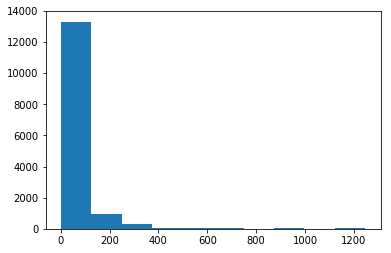

In [16]:
# Kode Anda
plt.hist(df['n_char'])

### Soal 2.6.b (3 poin)

Gambarkan histogram untuk log(`n_char`) (jangan lupa untuk mengganti label pada sumbu x)! Apa yang terjadi dan mengapa kita melakukan hal ini?

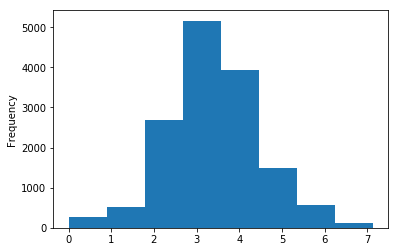

In [17]:
# Kode Anda
np.log(df['n_char']).plot.hist(bins=8)
plt.show()

*Dapat kita ketahui bahwa apabila mengunakan log, maka histogramnya akan menjadi terdistribusi normal*

### Soal 2.7 (8 poin)

Cocokkan dua kurva distribusi Gaussian untuk masing-masing kelas berdasarkan log(`n_char`)! Berikan warna merah untuk spam dan warna hijau untuk ham. Jangan lupa untuk memberikan legenda untuk masing-masing kelas!

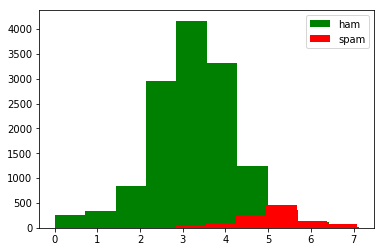

In [18]:
# Kode Anda
plt.hist(np.log(df[df['label']==0]['n_char']),label='ham', color='g')
plt.hist(np.log(df[df['label']==1]['n_char']),label='spam', color='r')
plt.legend()

### Soal 2.8 (7 poin)

Berikan kesimpulan dari hal-hal yang telah Anda lakukan terhadap dataset ini! Anda diperkenankan melakukan eksplorasi tambahan jika dirasa perlu.

*Dari hasil eksplorasi terhadap dataset ini, dapat diketahui bahwa:*
1. Median akan lebih penting apabila data tidak terdistribusi normal atau memiliki pencilan (outlayer)
2. dengan menggunakan log, data bisa terlihat seperti terdistribusi normal
3. Cosine similarity dapat digunakan untuk melihat seberapa mirip dari antar dokumen
4. Korelasi antara pattern dada|herba|langsing|payudara|pemutih|penggemuk|peninggi|tahan lama|tinggi badan dan/atau juga bbm_pin dengan dokumen dapat membuktikan bahwa apabila korelasinya tinggi, dapat dikatakan dokumen tersebut berlabel spam, dan apabila korelasi rendah, dapat dikatakan dokumen tersebut berlabel ham

### Soal 2.9 (5 poin)

Anda diberikan kesempatan untuk memberikan visualisasi tambahan dengan menggunakan dataset yang diberikan. Anda bebas untuk memilih grafik apapun yang ingin Anda hasilkan. Semakin menarik observasi yang Anda gambarkan, semakin besar poin yang dapat diberikan untuk soal ini.

In [19]:
from seaborn import set_context
set_context("talk")

In [20]:
col = list(df.columns) 
col = col[28:]

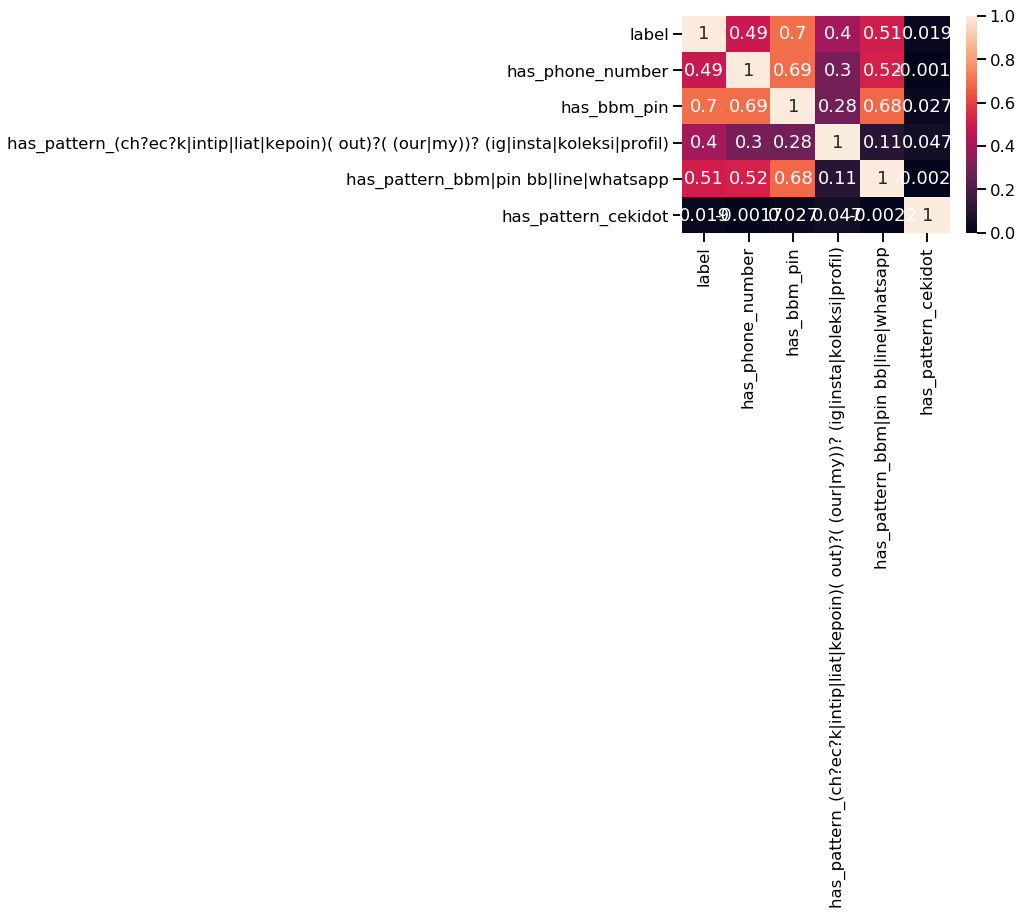

In [21]:
sns.heatmap(df[['label',col[0],col[1],col[2],col[3],col[4]]].corr(), annot=True);

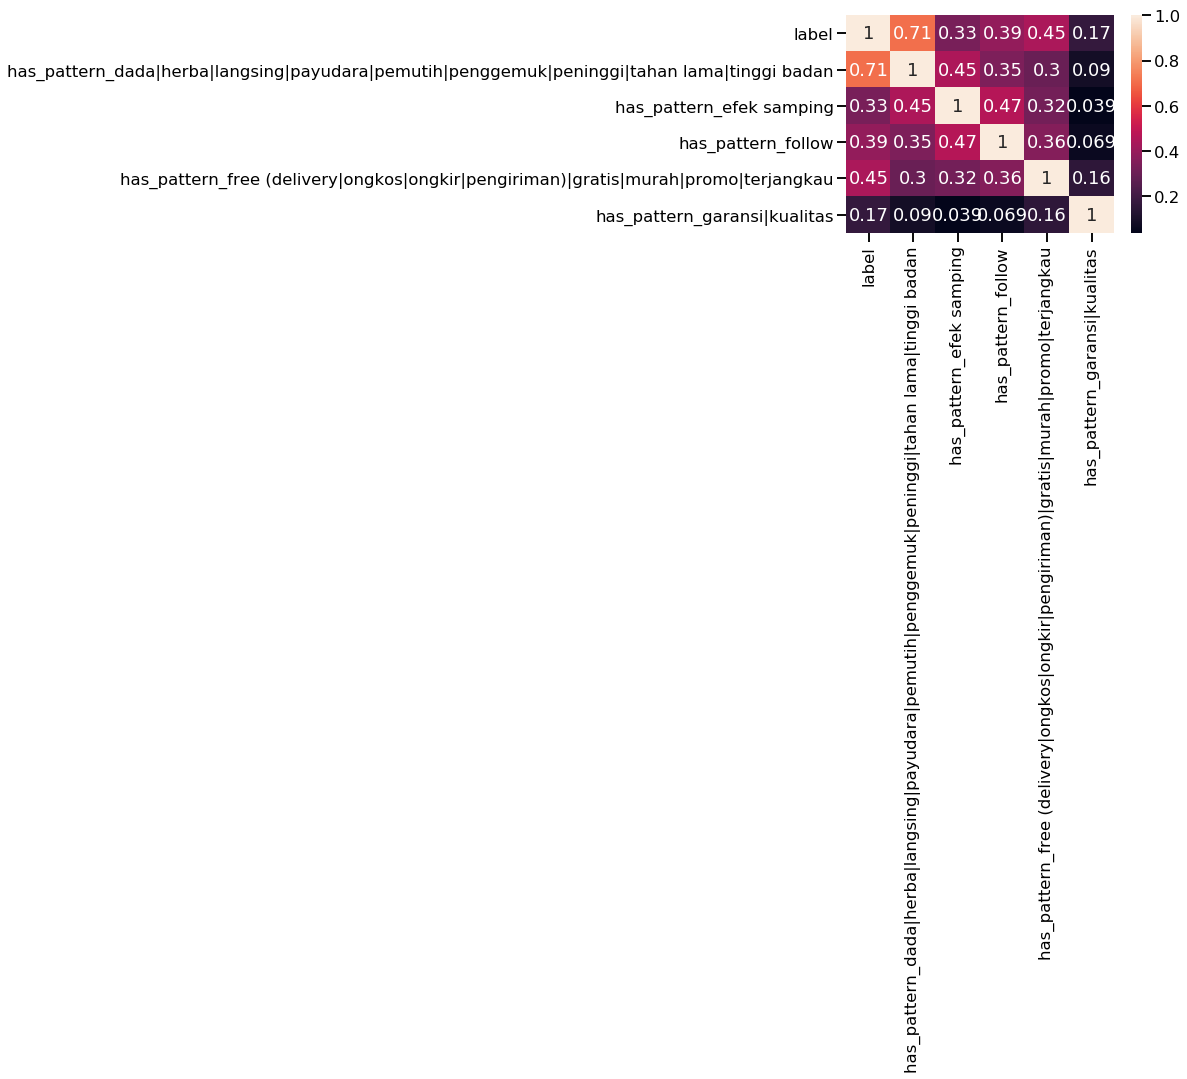

In [22]:
sns.heatmap(df[['label',col[5],col[6],col[7],col[8],col[9]]].corr(), annot=True);

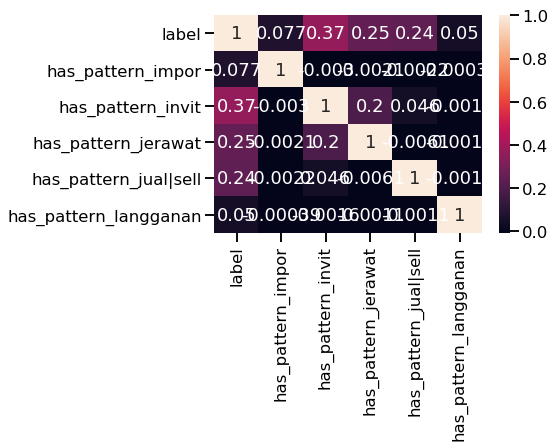

In [23]:
sns.heatmap(df[['label',col[10],col[11],col[12],col[13],col[14]]].corr(), annot=True);

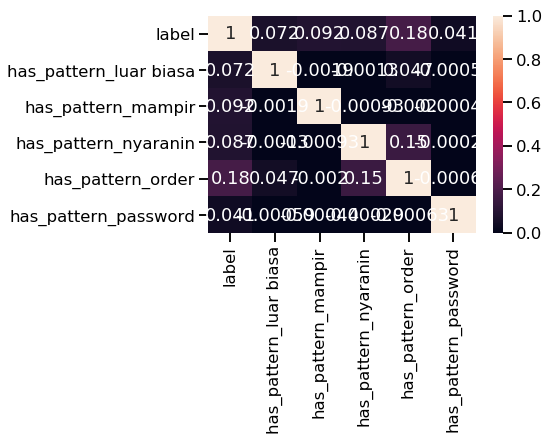

In [24]:
sns.heatmap(df[['label',col[15],col[16],col[17],col[18],col[19]]].corr(), annot=True);

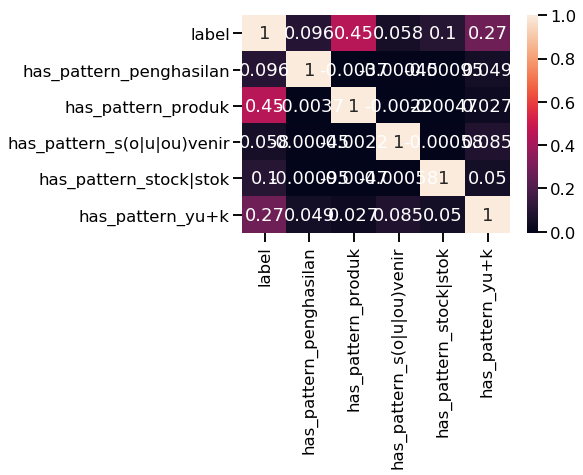

In [25]:
sns.heatmap(df[['label',col[20],col[21],col[22],col[23],col[24]]].corr(), annot=True);

*Dari hasil beberapa heatmap diatas, dapat dikatakan korelasi antara dokumen berlabel spam dengan pattern dada|herba|langsing|payudara|pemutih|penggemuk|peninggi|tahan lama|tinggi badan dan juga bbm_pin sangat tinggi, oleh karena itu, apabila dokumen memiliki pola tersebut, dokumen berkemungkinan berlabel spam*